![link text](https://www.medicasur.com.mx/work/models/ms/Resource/9676/200421-portada-COVID.jpg)

<div style="Text-align: center">
    <h1> Coronavirus en México </h1><br>
        <h2> Análisis inteligente de datos</h2>
        <p><strong> Nombre docente </strong></p>
        <p> Jose Gabriel Rodriguez Rivas <p>
        <p><strong> Nombre Alumno </strong></p>
</div>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('fivethirtyeight')
%matplotlib inline

In [64]:
# Import the file, stores-dist.csv
covidmx = pd.read_csv('./covid19mexico.csv', encoding='iso-8859-1')

# Verify the imported data
covidmx

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-08-09,11c49c,2,3,2,1,2,2,2,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
1,2020-08-09,144935,2,3,2,2,26,2,2,1,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,2020-08-09,1bf200,2,4,9,1,9,9,15,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
3,2020-08-09,010133,2,4,26,1,26,26,55,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,2020-08-09,1a1635,2,3,15,2,15,15,33,2,...,2,1,2,2,1,1,99,MÃ©xico,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091690,2020-08-09,0dc827,2,12,28,2,28,28,22,1,...,2,2,2,2,1,3,99,MÃ©xico,99,97
1091691,2020-08-09,08e859,2,4,14,2,14,14,23,2,...,2,2,2,2,99,3,99,MÃ©xico,99,2
1091692,2020-08-09,0564a9,2,12,9,1,9,9,10,1,...,2,2,2,2,1,3,99,MÃ©xico,99,97
1091693,2020-08-09,16c078,2,6,11,1,11,11,17,2,...,2,2,2,2,1,3,99,MÃ©xico,99,2


In [66]:
covidmx.drop(['FECHA_ACTUALIZACION','ID_REGISTRO','ORIGEN'], inplace=True, axis=1)

covidmx.head()

,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,FECHA_SINTOMAS,FECHA_DEF,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,3,2,1,2,2,2,1,2020-05-18,2020-05-15,9999-99-99,...,2,2,2,2,1,1,99,MÃ©xico,99,97
1,3,2,2,26,2,2,1,2020-05-26,2020-05-22,9999-99-99,...,2,2,2,2,1,1,99,MÃ©xico,99,97
2,4,9,1,9,9,15,2,2020-04-09,2020-04-09,9999-99-99,...,2,2,2,2,99,1,99,MÃ©xico,99,2
3,4,26,1,26,26,55,1,2020-03-23,2020-03-12,9999-99-99,...,2,2,2,2,99,1,99,MÃ©xico,99,97
4,3,15,2,15,15,33,2,2020-05-24,2020-05-20,2020-06-12,...,2,1,2,2,1,1,99,MÃ©xico,99,2


# Contagios México

In [59]:
resultados = covidmx['RESULTADO'].value_counts(sort=False)
resultados

1    480278
2    526911
3     84506
Name: RESULTADO, dtype: int64

#### Casos positivos acumulados
480,278
#### Casos negativos acumulados
526,911
#### Casos sospechosos acumulados
84,506

In [107]:
pct = [100/1091695*n for n in resultados]
pct

[43.99378947416632, 48.26540379868003, 7.740806727153646]

([<matplotlib.patches.Wedge at 0x7f1fba70f640>,
 [Text(0.20633027850320731, 1.0804757360407446, 'Positivos'),
  Text(-0.46043214270919997, -0.9990006216015159, 'Negativos'),
  Text(1.0676336521338765, -0.2648742811812441, 'Pendientes')],
 [Text(0.1125437882744767, 0.5893504014767698, '43.99%'),
  Text(-0.251144805114109, -0.5449094299644631, '48.27%'),
  Text(0.5823456284366598, -0.14447688064431496, '7.74%')])

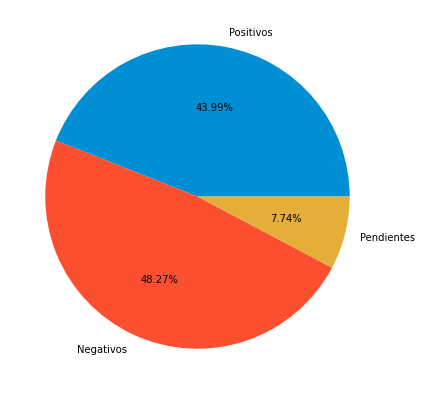

In [161]:
fig, ax = plt.subplots(figsize=(20, 7))

labels = 'Positivos', 'Negativos', 'Pendientes'

ax.pie(pct, labels=labels, autopct='%1.2f%%')

## Defunciones

In [203]:
defunciones = covidmx[covidmx['FECHA_DEF'] != '9999-99-99']
defunciones.shape

(67165, 32)

In [204]:
defunciones = defunciones['RESULTADO'].value_counts()
defunciones

1    52298
2    12437
3     2430
Name: RESULTADO, dtype: int64

### Defunciones con COVID-19
52298
### Defunciones sin COVID-19
12437
### Defunciones con resultado pendiente
2430

In [207]:
pctd = [100/67165*n for n in defunciones]
pctd

[77.86495942827365, 18.517084791185884, 3.6179557805404596]

([<matplotlib.patches.Wedge at 0x7f1fbc547fd0>,
 [Text(-0.8445822461340543, 0.7047558651867722, 'con COVID-19'),
  Text(0.7592012998249641, -0.7959983582546418, 'sin COVID-19'),
  Text(1.092902216258395, -0.124758749983673, 'Pendientes')],
 [Text(-0.46068122516402954, 0.3844122901018758, '77.86%'),
  Text(0.41410979990452584, -0.43418092268435005, '18.52%'),
  Text(0.596128481595488, -0.06805022726382164, '3.62%')])

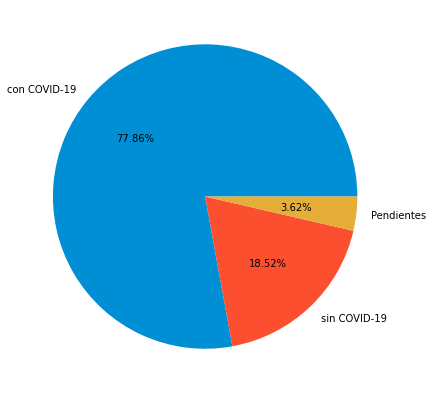

In [208]:


fig, ax = plt.subplots(figsize=(20, 7))

labels = 'con COVID-19', 'sin COVID-19', 'Pendientes'

ax.pie(pctd, labels=labels, autopct='%1.2f%%')

# Casos positivos

In [ ]:
positivos = covidmx[covidmx.RESULTADO == 1]
positivos.drop(['RESULTADO'], inplace=True, axis=1)
positivos.shape

### Genero y Tipo paciente

In [89]:
genero = positivos['SEXO'].value_counts()
genero

2    254349
1    225929
Name: SEXO, dtype: int64

#### Hombres 254,349
#### Mujeres 225,929

In [111]:
tipop = positivos['TIPO_PACIENTE'].value_counts()
tipop

1    352466
2    127812
Name: TIPO_PACIENTE, dtype: int64

#### Ambulatorios 352,466
#### Hospitalizados 127,812

In [113]:
pctg = [100/480278*n for n in genero]

pctt= [100/480278*n for n in tipop]

print(pctg, pctt)

[52.95870308446358, 47.04129691553642] [73.38791283381708, 26.61208716618292]


([<matplotlib.patches.Wedge at 0x7f1fbb597790>,
 [Text(-0.7374443065096563, 0.8161959904315215, 'Ambulatorios'),
  Text(0.7374443829274366, -0.816195921386999, 'Hospitalizados')],
 [Text(-0.402242349005267, 0.44519781296264804, '73.39%'),
  Text(0.4022423906876927, -0.44519777530199944, '26.61%')])

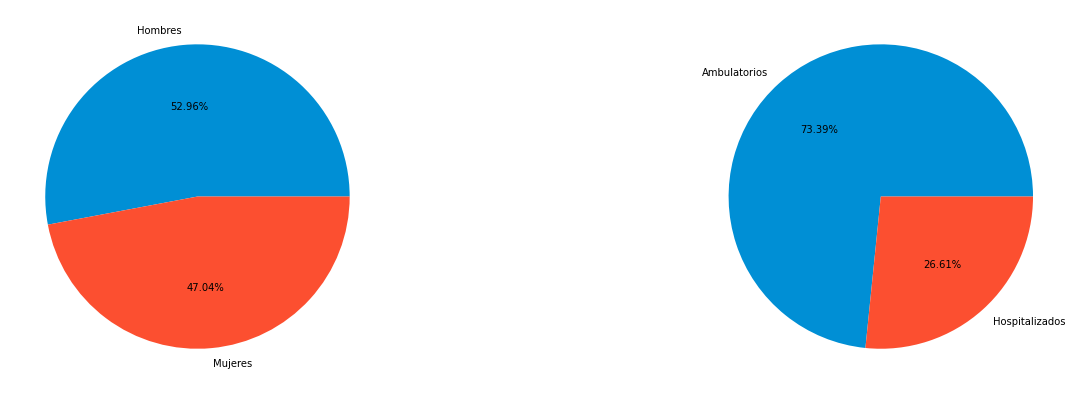

In [116]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

labelsg = 'Hombres', 'Mujeres'
labelst = 'Ambulatorios', 'Hospitalizados'

ax[0].pie(pctg, labels=labelsg, autopct='%1.2f%%')
ax[1].pie(pctt, labels=labelst, autopct='%1.2f%%')

### Embarazo e Intubados

In [136]:
embarazo = positivos['EMBARAZO'].value_counts()
embarazo.drop(97, inplace=True)
embarazo

2     220890
1       3480
98      1559
Name: EMBARAZO, dtype: int64

#### Embarazos
3480

In [139]:
intubado = positivos['INTUBADO'].value_counts()
intubado.drop(97, inplace=True)
intubado

2     115408
1      12288
99       116
Name: INTUBADO, dtype: int64

#### Intubados
12288

In [140]:
pcte = [100/225929*n for n in embarazo]

pcti= [100/127812*n for n in intubado]

print(pcte, pcti)

[97.76965329816004, 1.540306910578102, 0.6900397912618565] [90.29512095890838, 9.614120739836634, 0.09075830125496823]


([<matplotlib.patches.Wedge at 0x7f1fe5620130>,
 [Text(-1.0492686845773522, 0.3302048266838528, 'Negativo'),
  Text(1.0483228889194278, -0.333195318946148, 'Positivo'),
  Text(1.0999955280619895, -0.0031365974598247053, 'No especificado')],
 [Text(-0.5723283734058284, 0.18011172364573788, '90.30%'),
  Text(0.5718124848651424, -0.18174290124335346, '9.61%'),
  Text(0.5999975607610851, -0.0017108713417225664, '0.09%')])

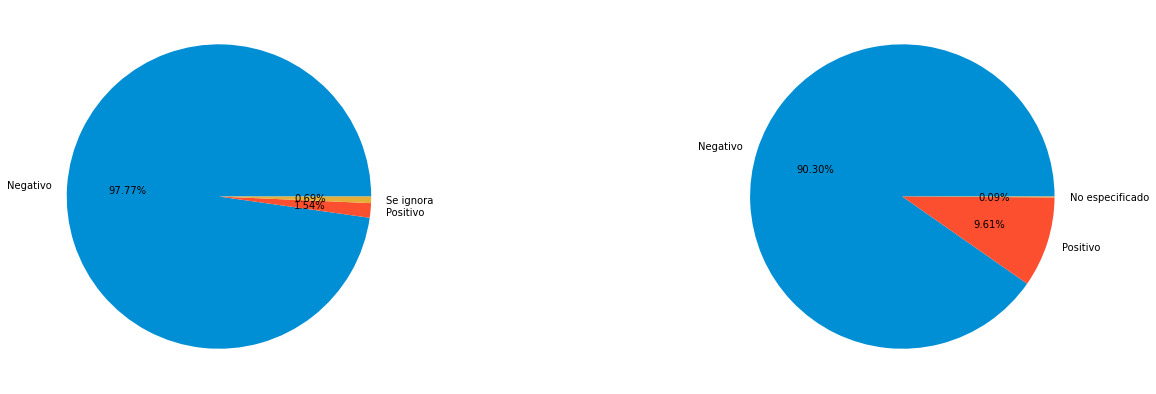

In [143]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

labelse = 'Negativo', 'Positivo', 'Se ignora'
labelsi = 'Negativo', 'Positivo', 'No especificado'

ax[0].pie(pcte, labels=labelse, autopct='%1.2f%%')
ax[1].pie(pcti, labels=labelsi, autopct='%1.2f%%')

### Edades

In [162]:
recienacidos = positivos[positivos['EDAD'] == 0]
recienacidos.shape

(973, 31)

#### Recien nacidos con COVID-19
973

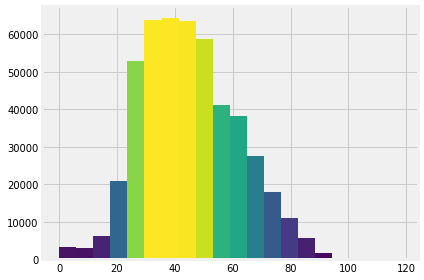

In [159]:
from matplotlib import colors

fig, axs = plt.subplots(tight_layout=True)

N, bins, patches = axs.hist(positivos['EDAD'], bins=20)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)